# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

# План работ:
    - Откроем файл и изучим общую информацию.
    - Выполним предобработку. Разберемся с пропусками. Поменяем тип данных. Избавимся от дубликатов.
    - Добавим в таблицу новые столбцы.
    - Проведем исследовательский анализ данных. Построим гистограмы и изучим что влияет на цену квартир.
    

## Откроем файл с данными и изучим общую информацию

### Загрузим данные из csv-файла в датафрейм c помощью библиотеки pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('real_estate_data.csv', sep='\t')
df.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Изучим общую информацию о датафрейме 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Как видим, встречаются пропуски в данных

Зафиксируем в отдельной переменной кол-во данных. Потом посмотрим сколько останется после фильтрации.

In [3]:
data_shape = df.shape
data_shape

(23699, 22)

### Построим гистограмму для всех числовых столбцов таблицы на одном графике

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

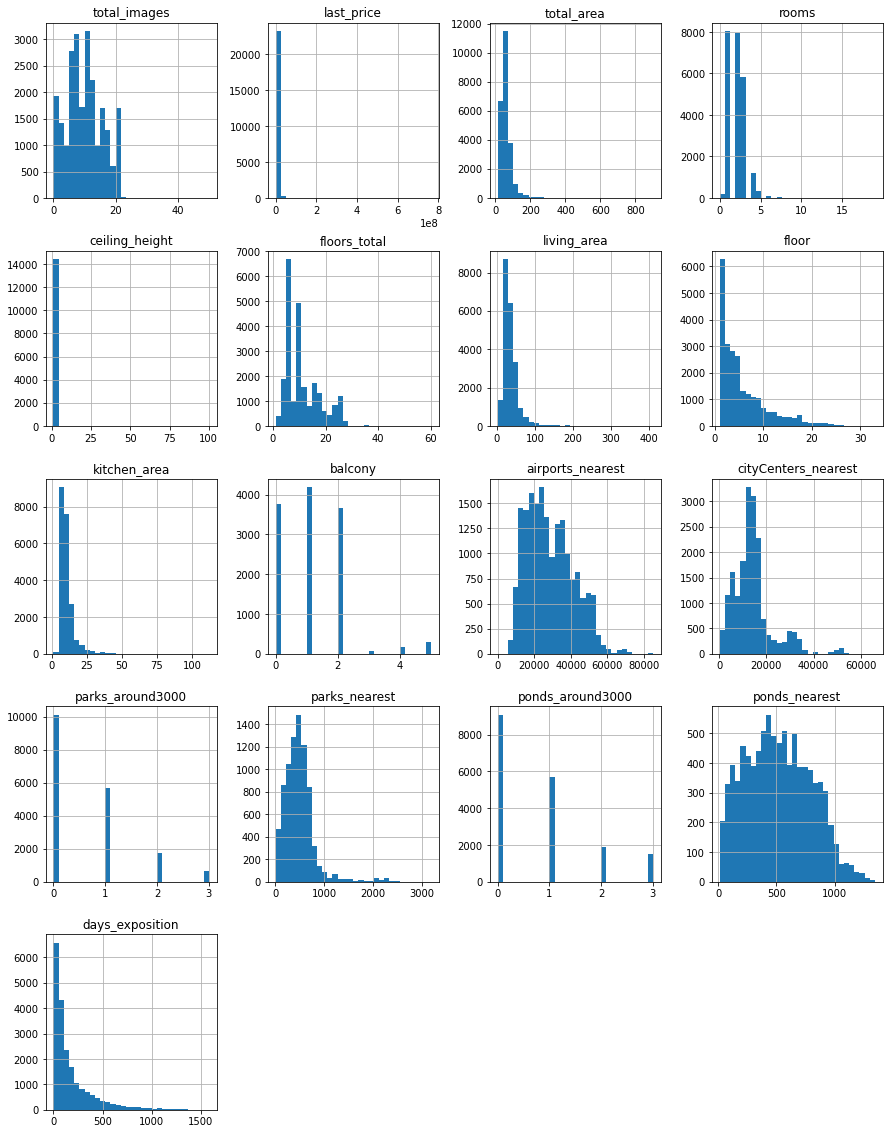

In [4]:
df.hist(figsize=(15,20), bins=30)

Исходя из данных с гистограм, видим, что:
- больше всего объявлений, где опубликовано около 10 фотографий.
- цена на момент снятия с публикации < 1e8 (100 млн.).
- больше всего квартир с общей площадью около 50-60кв.м.
- больше всего 1 комн. и 2 комн. квартир.
- высота потолков в среднем не превышает 3 метров (но есть аномалии).
- чаще всего встречаются 5 и 10 этажные дома.
- пик в 25кв.м. в жилой площади.
- чаще жилье находится на 1-5 этажах.
- пик площади кухни в 10 кв.м. (и чуть меньше).
- чаще балконов либо нет, либо их 1 или 2.
- ближайшее расстояние до аэропорта чаще всего – это 20-25км.
- ближайшее растояние до центра города чаще всего – это ~15км.
- парков в радиусе 3км чаще всего совсем нет
- растояние до ближайшего парка чаще всего – 500м (но встречаются немало и с отметкой около 0???).
- водоемов в радиусе 3км чаще всего совсем нет
- ближайшее растояние до водоема, чаще всего – 450м
- много объявлений, которые были размещены меньше месяца.

## Выполним предобработку данных

### Посмотрим кол-во пропусков по каждому столбцу:

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Как помним, в таблице 23699 строк.
- В "ceiling_height" (высота потолков) - 9195 пропусков (около одной трети). Возможно удастся заполнить медианными или средними значениями.
- В "floors_total" (всего этажей) - меньше сотни пропусков. Предлагаю заполнить значением "floors".
- В столбце "living_area" (жилая площадь) - 1903 пропусков. Надо проследить какие данные (и есть ли они вообще) записаны в "kitchen_area". Может удастся отнять от общей площади и получить таким путем жилую площадь.
- В столбце "is_apartment" (является апартаментами) больше всего пропущенных значений - 20924 записей. Сложно сказать о причинах столь большого числа пропусков. Нужно изучить какие значения встречаются, может удастся выявить какую-то закономерность. Если нет, то оставить как есть.
- В "kitchen_area" - 2278 пропущенных записей. Надо посмотреть какие данные в столбцах с общей и жилой площадью. Если в жилой площади тоже отсутствуют данные, то, возможно, это означает, что мы имеем дело со студиями или евро двушками-трешками, у которых жилое помещение соеденино с кухонной зоной. Предлагаю в таких случаях ставить 0.
- В "balcony" - почти половина пропусков. Возможно, если продавец не указал число балконов, то их и нет вовсе. Предлагаю в данном случае заменять на 0.
- В "locality_name" - 49 пропусков. Это мало, но все-таки. Посмотрим на значение "cityCenters_nearest", и если оно меньше определенного значения, то заменим на "Санкт-Петербург"
- Хочется выделить несколько столбцов:
    - airports_nearest-  5542 пропусков (около четверти).
    - cityCenters_nearest - 5519 пропусков (около четверти).
    - parks_nearest - 15620 пропусков (больше половины).
    - ponds_nearest - 14589 пропусков (больше половины).
    - Эти данные автоматически получены из геосервисов. Скорее всего при получении результатов произошла ошибка. Думаю, придется оставить пропуски.
- В "days_exposition" - 3181 пропусков (это почти седьмая часть). Значат ли пропущенные данные, что объявление до сих пор не сняли с публикации? Но в таком случае у нас было бы хоть какое-то число. Возможно мы имеем дело с ошибкой. Предлагаю пока оставить, как есть.

##### Разберемся с пропусками ceiling_height

Подставим медианные значения в пропуски. Сразу же проверим.

In [6]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].isna().sum()

0

##### Пропуски "floors_total"

Предлагаю заполнить пропуски значением в ячейке floor, и проверим результат:

In [7]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])
df['floors_total'].isna().sum()

0

##### Разберемся с пропусками в "living_area"

Мне интересно сгруппировать значения по комнатам и посмотреть медианные значения:

In [8]:
df.groupby('rooms').median()[['living_area','total_area','kitchen_area']]

,living_area,total_area,kitchen_area
rooms,,,
0,18.000,26.05,NaN
1,17.600,36.56,9.04
2,30.500,53.00,8.80
3,45.000,73.00,9.50
4,63.600,99.30,11.10
5,91.785,146.45,15.10
6,123.900,184.30,19.50
7,145.000,214.00,20.00
8,161.000,235.70,25.00


Заменим все пропуски в living_area на медианные значения среди квартир с тем же кол-вом комнат:

In [9]:
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [10]:
for r in df['rooms'].unique():
    df.loc[(df['rooms'] == r) & (df['living_area'].isna()),'living_area'] = df.loc[(df['rooms']==r), 'living_area'].median()

Проверим, что с пропусками:

In [11]:
df['living_area'].isna().sum()

0

Их нет! Замечательно!

##### Разберемся с пропусками в "kitchen_area":

Предлагаю сделать то же самое, что мы делали с "living_area".
Но метод не может посчитать медианное значение для 0 комнат и это нам помешает. Поэтому, для начала, заменим пропуски c 0 комнатами, на значение 0, т.к. это студии:

In [12]:
df.loc[(df['rooms'] == 0) & (df['kitchen_area'].isna()),'kitchen_area'] = df.loc[(df['rooms'] == 0) & (df['kitchen_area'].isna()),'kitchen_area'].fillna(0)

In [13]:
for r in df['rooms'].unique():
    df.loc[(df['rooms'] == r) & (df['kitchen_area'].isna()),'kitchen_area'] = df.loc[(df['rooms']==r), 'kitchen_area'].median()

Проверим, что с пропусками:

In [14]:
df['kitchen_area'].isna().sum()

0

Нету. Класс!

##### Разберемся с пропусками в "balcony"

Предлагаю в данном случае заменить пропуски на ноль. Если про балкон забыли указать, возможно его и нет. Сразу проверим.

In [15]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

##### Разберемся с пропусками в "locality_name"

In [19]:
df['locality_name'].isna().sum()

49

In [22]:
df = df.dropna(subset=['locality_name']).reset_index(drop=True)
df['locality_name'].isna().sum()

0

Пропусков больше нет!

### Найдем столбцы, в которых нужно изменить тип данных.

Из общей информации о датафрейме видим, что у следующих столбцов нужно поменять тип данных:

- first_day_exposition  23699 non-null  object -> datetime
- is_apartment          2775 non-null   object -> bool

##### Меняем формат "first_day_exposition" на datetime, с помощью метода to_datetime():

In [23]:
df['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [24]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

##### Разберемся с пропусками "is_apartment"

Меня интересует, как данный столбец связан с "studio".

In [25]:
print(df[['is_apartment','studio','floors_total']].query('~(is_apartment.isna()) & studio == True'))
print()
print(df[['is_apartment','studio','floors_total']].query('~(is_apartment.isna()) & is_apartment == True'))

      is_apartment  studio  floors_total
2387         False    True          12.0
3183         False    True          14.0
4174         False    True          10.0
4922         False    True           4.0
5845         False    True           3.0
7244         False    True          16.0
8668         False    True          23.0
10516        False    True          17.0
11008        False    True          26.0
12915        False    True           8.0
15117        False    True          21.0
20049        False    True          15.0
20546        False    True          18.0
21659        False    True          20.0
22606        False    True          14.0

      is_apartment  studio  floors_total
543           True   False           3.0
916           True   False           3.0
1108          True   False           6.0
1607          True   False           9.0
2755          True   False           3.0
2971          True   False           4.0
3063          True   False           7.0
3811          T

Здесь мы четко видим, что если жилье - квартира, то она не студия, а если это студия, то не квартира. Интересно, встречается ли такое, что Жилье не является ни квартирой ни студией?

In [26]:
df[['is_apartment','studio','floors_total']].query('~(is_apartment.isna()) & studio == False & is_apartment == False')

,is_apartment,studio,floors_total
11,False,False,5.0
25,False,False,23.0
29,False,False,19.0
36,False,False,9.0
41,False,False,14.0
...,...,...,...
23616,False,False,6.0
23618,False,False,17.0
23622,False,False,9.0
23629,False,False,3.0


Как видим - встречается. И таких данных большинство. Предлагаю заполнить все пропуски в столбце "is_apartment" истиной. Но сначала посмотрим распределение значений по столбцу:

In [27]:
df.groupby('is_apartment').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
is_apartment,,,,,,,,,,,,,,,,,,,,,
False,2710,2710,2710,2710,2710,2710,2710,2710,2710,2710,...,2710,2710,2710,2093,2094,2094,922,2094,1040,2447
True,50,50,50,50,50,50,50,50,50,50,...,50,50,50,41,43,43,19,43,30,38


##### Меняем object на bool в столбце "is_apartment"

In [28]:
df['is_apartment'] = df['is_apartment'].astype('bool', errors='ignore')

Посмотрим какие значения приняли пропуски:

In [29]:
df.groupby('is_apartment').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
is_apartment,,,,,,,,,,,,,,,,,,,,,
False,2710,2710,2710,2710,2710,2710,2710,2710,2710,2710,...,2710,2710,2710,2093,2094,2094,922,2094,1040,2447
True,20940,20940,20940,20940,20940,20940,20940,20940,20940,20940,...,20940,20940,20940,16023,16045,16046,7142,16046,8045,18023


Пропуски приняли значение True. Меня это устраивает. Ведь, скорей всего, из-за очевидности, продавцы забыли указать, является жилье квартирой или нет.

##### Снова проверим общую информацию:

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

Все так, как нам нужно! Оставшиеся пропуски оставим.

##### Разберемся с неявными дубликатами

In [31]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Видим, что встречаются несколько похожих наименований "посёлок", "поселок", "поселок городского типа", "городской посёлок".
Заменим это все на "поселок".

In [32]:
df['locality_name'] = (
    df['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'городской поселок'], 'поселок', regex=True)
)

Проверим, что получилось

In [33]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

Теперь нам не попадаются неявные дубликаты.

##### Промежуточный итог
Мы разобрались с пропусками. Где-то подставили медианные значения, а где-то подставили конечное значение ("floor") или нулевое ("balcony").
На основе удаленности от центра города мы подставили в пропуски значение местности Санкт-Петербург или Лен. область.
Поменяли форматы для двух столбцов ("first_day_exposition" и "is_apartment").
Убрали неявные дубликаты.

## Добавим в таблицу новые столбцы

##### Добавьте столбец "цена одного квадратного метра" (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой).
Назовем его "price_for_m2".

In [34]:
df['price_for_m2'] = df['last_price'] / df['total_area']
df['price_for_m2'] = round(df['price_for_m2'], 2)

Проверим, как получилось.

In [35]:
df['price_for_m2'].head()

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: price_for_m2, dtype: float64

##### Добавьте столбец "день недели публикации объявления" (0 — понедельник, 1 — вторник и так далее).
Назовем его "weekday_post".

In [36]:
df['weekday_post'] = df['first_day_exposition'].dt.weekday

Проверим

In [37]:
df[['first_day_exposition', 'weekday_post']].head()

,first_day_exposition,weekday_post
0,2019-03-07,3
1,2018-12-04,1
2,2015-08-20,3
3,2015-07-24,4
4,2018-06-19,1


7 марта 2019 года действительно был Четвергом.

##### Добавьте столбец "месяц публикации объявления".
Назовем его "month_post".

In [38]:
df['month_post'] = df['first_day_exposition'].dt.month

Проверим:

In [39]:
df[['first_day_exposition', 'month_post']].head()

,first_day_exposition,month_post
0,2019-03-07,3
1,2018-12-04,12
2,2015-08-20,8
3,2015-07-24,7
4,2018-06-19,6


Все верно!

##### Добавьте столбец год публикации объявления. 
Назовем его "year_post".

In [40]:
df['year_post'] = df['first_day_exposition'].dt.year

Проверим:

In [41]:
df[['first_day_exposition', 'year_post']].head()

,first_day_exposition,year_post
0,2019-03-07,2019
1,2018-12-04,2018
2,2015-08-20,2015
3,2015-07-24,2015
4,2018-06-19,2018


Все верно!

##### Добавьте столбец "тип этажа квартиры" (значения — «первый», «последний», «другой»). 
Назовем его "floor_type".

In [42]:
for row in range(len(df)):
    if df.loc[row, 'floor'] == 1:
        df.loc[row, 'floor_type'] = "первый"
    elif df.loc[row, 'floor'] == df.loc[row, 'floors_total']:
        df.loc[row, 'floor_type'] = "последний"
    else:
        df.loc[row, 'floor_type'] = "другой"

Проверим:

In [43]:
df[['floors_total', 'floor', 'floor_type']].head(15)

,floors_total,floor,floor_type
0,16.0,8,другой
1,11.0,1,первый
2,5.0,4,другой
3,14.0,9,другой
4,14.0,13,другой
5,12.0,5,другой
6,26.0,6,другой
7,24.0,22,другой
8,27.0,26,другой
9,9.0,7,другой


Все верно!

##### Добавьте столбец "расстояние до центра города в километрах" (нужно перевести из м в км и округлить до ближайших целых значений). 
Назовем "cityCenters_km"

In [44]:
df['cityCenters_km'] = df['cityCenters_nearest'] / 1000
df['cityCenters_km'] = round(df['cityCenters_km'])

Проверим:

In [45]:
df[['cityCenters_nearest', 'cityCenters_km']].head()

,cityCenters_nearest,cityCenters_km
0,16028.0,16.0
1,18603.0,19.0
2,13933.0,14.0
3,6800.0,7.0
4,8098.0,8.0


Все верно!

##### Промежуточный итог
Мы добавили новые столбцы, для отображения цены за кв.м., дня, месяца и года публикации. Добавили тип этажа квартиры и  расстояние до центра города в км.

## Проведем исследовательский анализ данных

##### Изучим следующий список параметров:
- общая площадь (total_area);
- жилая площадь (living_area);
- площадь кухни (kitchen_area);
- цена объекта (last_price);
- количество комнат (rooms);
- высота потолков (ceiling_height);
- тип этажа квартиры («первый», «последний», «другой») (floor_type);
- общее количество этажей в доме (floors_total);
- расстояние до центра города в метрах (cityCenters_nearest);
- расстояние до ближайшего парка (parks_nearest)

<b>Общая площадь (total_area)</b>

<AxesSubplot:>

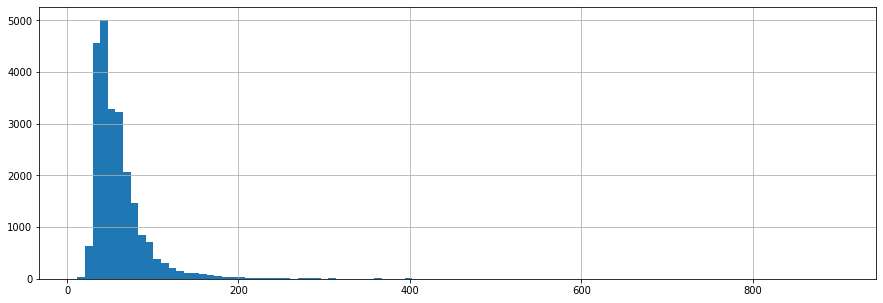

In [46]:
df['total_area'].hist(bins=100, figsize = (15, 5))

Мы наблюдаем распределение Пуасона, с пиком возле значений 50-60 кв.м. Ничего подозрительного, на мой взгляд, нет.

<b>Жилая площадь (living_area)</b>

<AxesSubplot:>

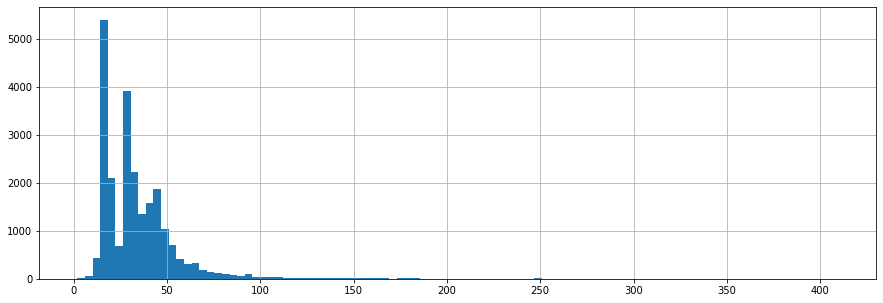

In [47]:
df['living_area'].hist(bins=100, figsize = (15, 5))

Здесь мы видим график с двумя пиками, напоминающим распределение Пуасона. Ничего подозрительного не наблюдаю.

<b>Площадь кухни (kitchen_area)</b>

<AxesSubplot:>

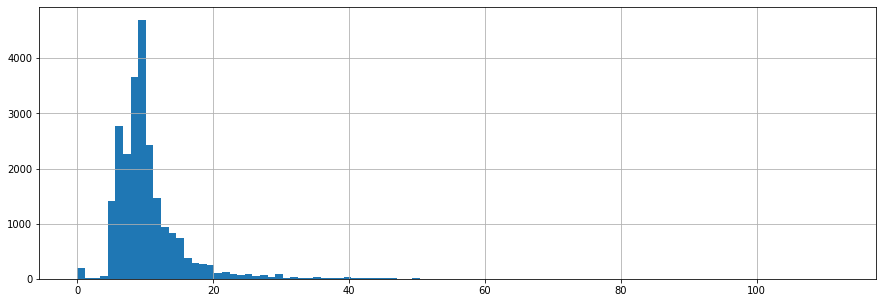

In [48]:
df['kitchen_area'].hist(bins=100, figsize=(15,5))

Здесь мы видим график с нормальным распределением. Да, встречаются квартиры, где площадь кухни = 0. Видимо это студии. Проверим.

In [49]:
if df[df['kitchen_area'] == 0]['kitchen_area'].count() == df[df['rooms'] == 0]['rooms'].count():
    print('Да, так и есть!')

Да, так и есть!


<b>Цена объекта (last_price);

<AxesSubplot:>

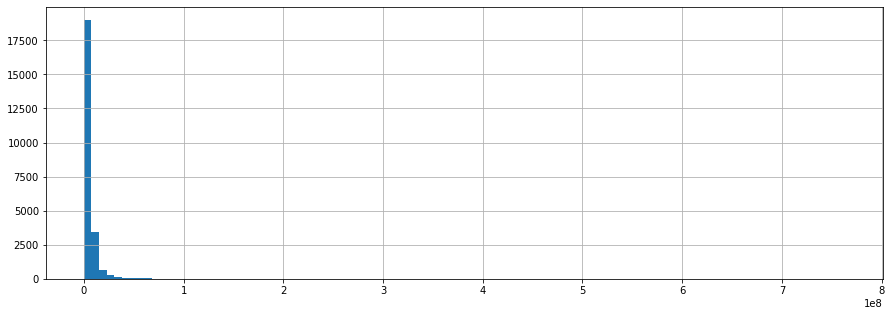

In [50]:
df['last_price'].hist(bins=100, figsize=(15,5))

Посмотрим поближе на цены

In [51]:
df['last_price'].sort_values(ascending=False)

12950    763000000.0
19505    420000000.0
14681    401300000.0
1435     330000000.0
15626    300000000.0
            ...     
9565        450000.0
16247       440000.0
14886       430000.0
17426       430000.0
8778         12190.0
Name: last_price, Length: 23650, dtype: float64

У меня вызывают сомнения самая дорогая и самая дешевая квартиры. Проверим их:

In [52]:
df.query('last_price > 300000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,weekday_post,month_post,year_post,floor_type,cityCenters_km
1435,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.0,5,True,...,519.0,3.0,285.0,233.0,1736842.11,2,4,2018,другой,1.0
12950,19,763000000.0,400.0,2017-09-30,7,2.65,10.0,250.0,10,True,...,530.0,3.0,756.0,33.0,1907500.00,5,9,2017,последний,4.0
14681,15,401300000.0,401.0,2016-02-20,5,2.65,9.0,204.0,9,False,...,545.0,1.0,478.0,393.0,1000748.13,5,2,2016,последний,2.0
19505,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,True,...,NaN,2.0,318.0,106.0,466666.67,2,12,2017,последний,8.0


Квартира за 763000000.0 рублей, все же похожа на правду. Теперь проверим квартиру за 12190.0:

In [53]:
df.query('last_price < 15000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,weekday_post,month_post,year_post,floor_type,cityCenters_km
8778,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,True,...,805.0,0.0,NaN,8.0,111.83,2,3,2019,последний,9.0


Похоже на аномалию. Предлагаю убрать.

In [54]:
df = df.query('last_price > 15000')

<b>Количество комнат (rooms)

<AxesSubplot:>

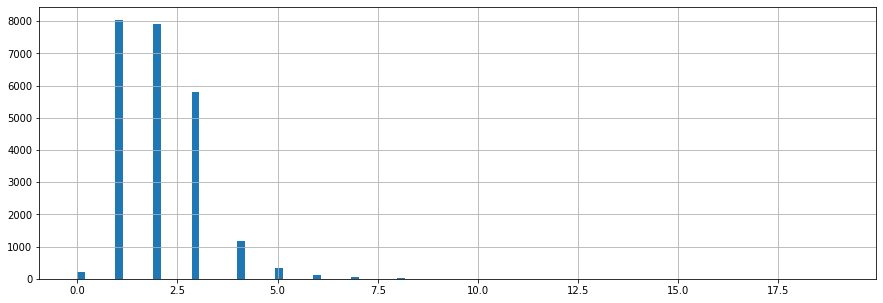

In [55]:
df['rooms'].hist(bins=100, figsize=(15,5))

Посмотрим поближе на количество комнат. Может там скрываются аномалии.

In [56]:
df['rooms'].sort_values(ascending=False)

14473    19
18815    16
5349     15
866      14
20789    14
         ..
7244      0
20609     0
7225      0
10711     0
17792     0
Name: rooms, Length: 23649, dtype: int64

In [57]:
df.query('rooms > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,weekday_post,month_post,year_post,floor_type,cityCenters_km
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,True,...,NaN,0.0,NaN,NaN,95264.02,6,7,2018,последний,3.0
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,True,...,NaN,2.0,435.0,418.0,68870.52,5,12,2017,другой,8.0
5349,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,True,...,767.0,0.0,NaN,14.0,110169.49,3,2,2019,другой,5.0
9672,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,True,...,686.0,2.0,66.0,813.0,170015.46,1,2,2017,другой,1.0
14473,6,32250000.0,374.6,2018-06-09,19,2.65,5.0,264.5,2,True,...,NaN,2.0,548.0,114.0,86091.83,5,6,2018,другой,4.0
18815,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,True,...,516.0,0.0,NaN,1365.0,105555.56,0,3,2015,последний,4.0
19505,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,True,...,NaN,2.0,318.0,106.0,466666.67,2,12,2017,последний,8.0
20789,6,28659000.0,245.4,2016-03-31,14,2.65,4.0,168.3,2,True,...,541.0,2.0,118.0,95.0,116784.84,3,3,2016,другой,2.0


Я не уверен, можно ли считать это аномалиями, поэтому оставлю, как есть.

<b>Высота потолков (ceiling_height)

<AxesSubplot:>

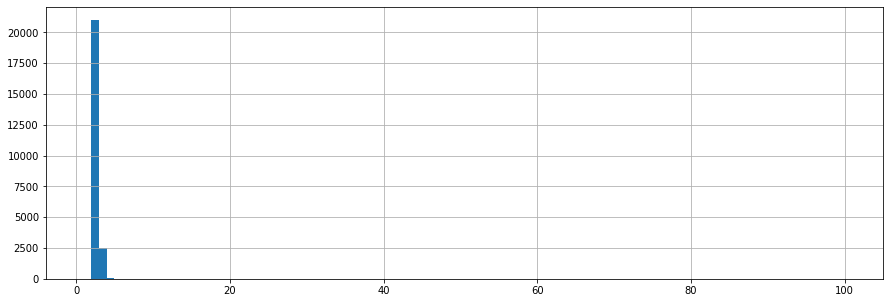

In [58]:
df['ceiling_height'].hist(bins=100, figsize=(15,5))

Посмотрим поближе:

In [59]:
df['ceiling_height'].sort_values(ascending=False)

22822    100.00
22291     32.00
3144      32.00
21334     27.50
20440     27.00
          ...  
16419      2.00
19294      2.00
16904      1.75
5702       1.20
22544      1.00
Name: ceiling_height, Length: 23649, dtype: float64

Встречаются квартиры с аномальной высотой потолков.

In [60]:
df.query('(ceiling_height < 2.4) | (ceiling_height > 5)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,weekday_post,month_post,year_post,floor_type,cityCenters_km
227,13,2200000.0,47.00,2018-01-12,3,2.34,5.0,45.000000,1,True,...,NaN,NaN,NaN,45.0,46808.51,4,1,2018,первый,NaN
355,17,3600000.0,55.20,2018-07-12,2,25.00,5.0,32.000000,2,False,...,NaN,NaN,NaN,259.0,65217.39,3,7,2018,другой,NaN
464,15,66571000.0,280.30,2015-06-11,6,5.20,8.0,159.500000,7,True,...,187.0,1.0,616.0,578.0,237499.11,3,6,2015,другой,7.0
552,11,2999000.0,33.50,2017-03-30,1,2.00,15.0,17.500000,6,True,...,520.0,1.0,949.0,270.0,89522.39,3,3,2017,другой,12.0
1026,20,155000000.0,310.00,2018-10-12,5,5.30,3.0,190.000000,3,True,...,NaN,1.0,603.0,NaN,500000.00,4,10,2018,последний,5.0
1387,20,59800000.0,399.00,2015-01-21,5,5.60,6.0,91.785000,6,True,...,149.0,2.0,577.0,719.0,149874.69,2,1,2015,последний,7.0
1581,4,4100000.0,45.60,2016-01-13,2,2.30,9.0,28.400000,8,False,...,489.0,1.0,525.0,329.0,89912.28,2,1,2016,другой,15.0
2570,4,2400000.0,62.00,2018-12-27,3,2.00,5.0,40.000000,4,True,...,NaN,NaN,NaN,NaN,38709.68,3,12,2018,другой,NaN
3144,14,2900000.0,75.00,2018-11-12,3,32.00,3.0,53.000000,2,True,...,NaN,NaN,NaN,NaN,38666.67,0,11,2018,другой,NaN
3470,3,1400000.0,30.00,2018-03-16,1,8.00,5.0,15.300000,2,False,...,NaN,NaN,NaN,125.0,46666.67,4,3,2018,другой,NaN


То, что двузначные числа записали неправильно, еще понять можно (25 м = 2.5 м и т.д.). Но потолки высотой 8 метров в многоквартирных домах - это что-то подорзрительное. Поэтому преобразуем двузначные в однозначные и удалим все, что выше 6 метров. А также удалим все что меньше 2.4 метров - это минимальная высота потолка по регламенту СНиП 31-01-2003 "Здания жилые одно- и многовкартирные" (отмененный в 2020 году).

In [61]:
df.loc[df['ceiling_height'] > 10, 'ceiling_height'] = df.loc[df['ceiling_height'] > 10, 'ceiling_height'] * 0.1

In [62]:
df = df.query('ceiling_height >= 2.4')

In [63]:
df = df.query('ceiling_height < 6')

<b>Тип этажа квартиры («первый», «последний», «другой») (floor_type)

<AxesSubplot:>

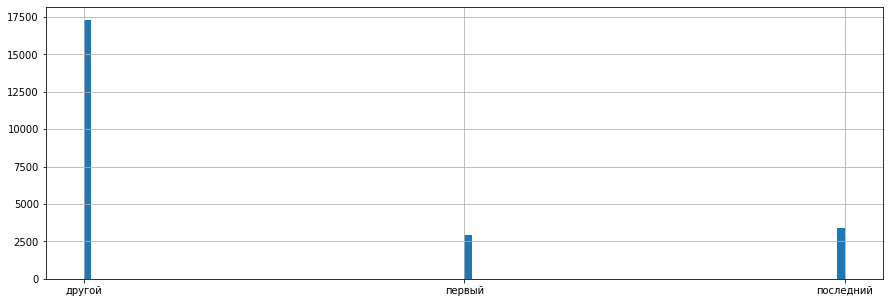

In [64]:
df['floor_type'].hist(bins=100, figsize=(15,5))

Здесь ничего не вызывает подозрений.

<b>Общее количество этажей в доме (floors_total)

<AxesSubplot:>

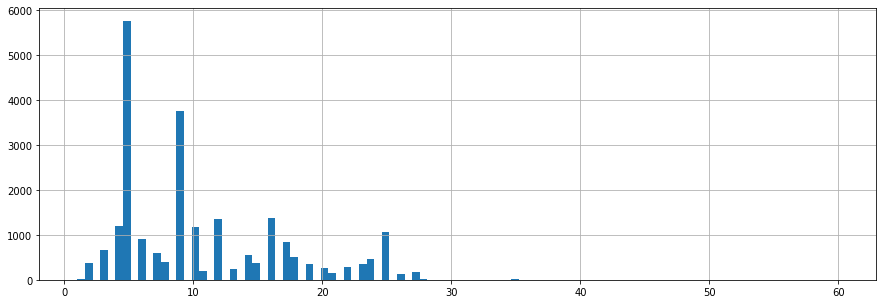

In [65]:
df['floors_total'].hist(bins=100, figsize=(15,5))

Меня смущает, что встречаются 60 этажи. Посмотрим поближе:

In [66]:
df['floors_total'].sort_values(ascending=False)

2251     60.0
16701    52.0
11061    36.0
397      36.0
5797     36.0
         ... 
10799     1.0
16417     1.0
4372      1.0
11622     1.0
22504     1.0
Name: floors_total, Length: 23618, dtype: float64

<i>Насколько мне известно, в Санкт-Петербурге есть два самых высоких здания: ЖК "Князь Александр Невский" (40 этажей) и ЖК "Leader Tower" (42 этажа). Основываясь на этом уберем 52 и 60 этажи.

In [67]:
df = df.query('floors_total < 52')

<b>Расстояние до центра города в метрах (cityCenters_nearest)

<AxesSubplot:>

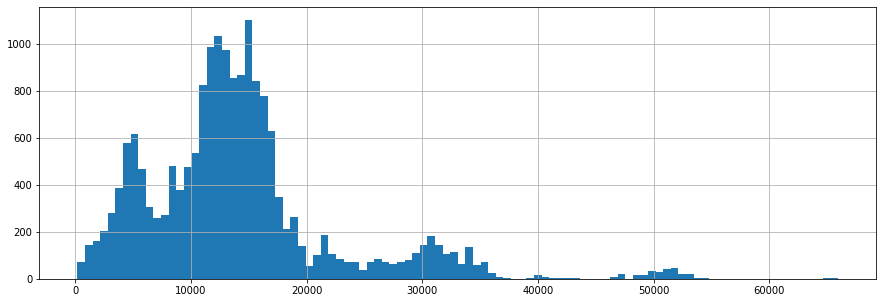

In [68]:
df['cityCenters_nearest'].hist(bins=100, figsize=(15,5))

Нормальное распределение с двумя пиками. Ничего необычного.

<b>Расстояние до ближайшего парка (parks_nearest)

<AxesSubplot:>

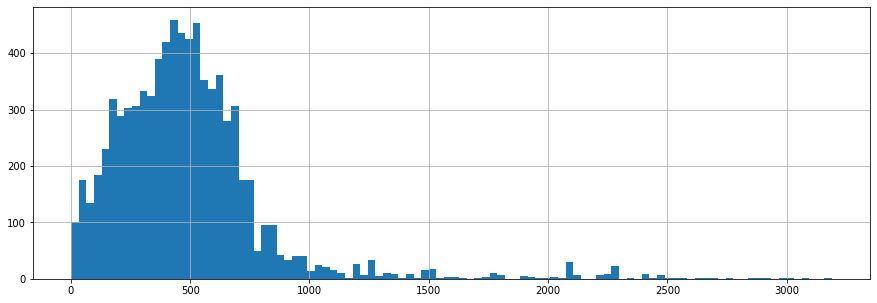

In [69]:
df['parks_nearest'].hist(bins=100, figsize=(15,5))

Нормальное распределение. Ничего необычного.

<b>Посмотрим, какая доля от изначального количества данных осталась после фильтрации

In [70]:
print("Изначально было:", data_shape, "данных")
print("Осталось:", df.shape, "данных")

Изначально было: (23699, 22) данных
Осталось: (23616, 28) данных


После фильтрации у нас осталось 99,8% данных. Мы можем провести актуальный анализ.

### Изучим, как быстро продавались квартиры
- Построим гистограмму.
- Посчитаем среднее и медиану.
- Опишем, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

<AxesSubplot:>

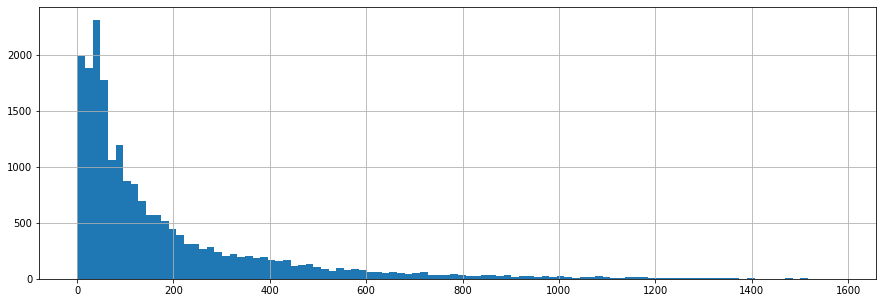

In [71]:
df['days_exposition'].hist(bins=100, figsize=(15,5))

У нас получилось распределение Пуасона, с пиком в начале гистограммы.

Посмотрим на медиану и среднее значение:

In [72]:
print('Median:', df['days_exposition'].median())
print('Mean:', df['days_exposition'].mean())

Median: 95.0
Mean: 180.8108121330724


<AxesSubplot:>

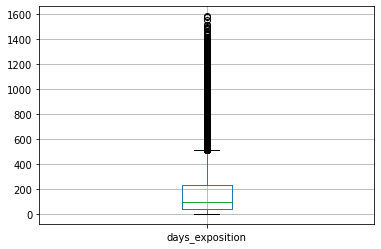

In [73]:
df.boxplot('days_exposition')

Мы видим, что обычно продажа занимает около трех месяцев (95 дней). Все, что продается менее, чем за 95 дней, можно считать быстрыми продажами. Все, что больше 500 - необычно долгими.

<AxesSubplot:>

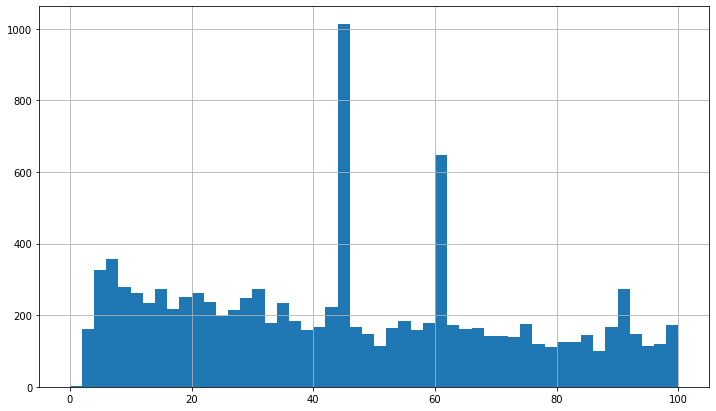

In [74]:
# Код ревьюера
df['days_exposition'].hist(bins=50, range=(0,100), figsize=(12, 7))

На гистограмме действительно заметны пики примерно через 45, 60 и 90 дней после начала продажи. Можно посмотреть на условия размещения объявлений в Яндекс.Недвижимости - https://yandex.ru/support/realty/owner/home/add-ads-housing.html С учетом того, что после формирования датасета правила размещения поменялись, эти пики являются следами автоматического снятия объявлений - поэтому оценивать скорость продажи стоит действительно по диаграмме размаха, взяв за быстрые продажи до 1 квартиля, за долгие - после третьего

Посмотрим поближе диаграмму размаха:

(0.0, 400.0)

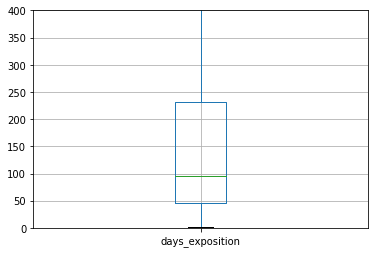

In [75]:
df.boxplot('days_exposition')
plt.ylim(0, 400)

Все, что до 50 дней будем считать за быстрые продажи. А все что больше 230 дней за долгие. И все, что более 500 дней - необычно долгие

### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.
- Изучим, зависит ли цена от:
 - общей площади;
 - жилой площади;
 - площади кухни;
 - количества комнат;
 - этажа, на котором расположена квартира (первый, последний, другой);
 - даты размещения (день недели, месяц, год).

Построим графики, которые покажут зависимость цены от указанных выше параметров.

<b>Построим график зависимости цены от общей площади:

0.6539359810531554

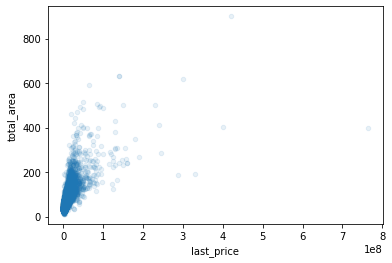

In [76]:
df.plot(x='last_price', y='total_area' , kind='scatter', alpha=0.1)
df['last_price'].corr(df['total_area'])

<i>Как видим, некая зависимость прослеживается. Коэффициент корреляции 0.65

<b>Построим график зависимости цены от жилой площади:

0.5555433944975754

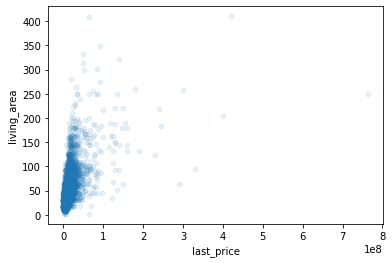

In [77]:
df.plot(x='last_price', y='living_area' , kind='scatter', alpha=0.1)
df['last_price'].corr(df['living_area'])

<i>Зависимость есть, но не явно выраженная. Коэффициент корреляции 0.55

<b>Построим график зависимости цены от площади кухни:

0.4526765352512173

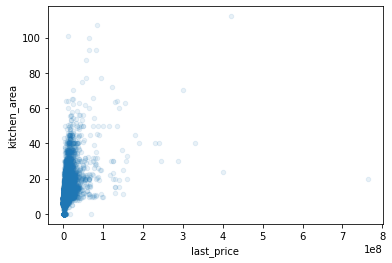

In [78]:
df.plot(x='last_price', y='kitchen_area' , kind='scatter', alpha=0.1)
df['last_price'].corr(df['kitchen_area'])

<i>Зависимость есть, но не явно выраженная. Коэффициент корреляции 0.45

<b>Построим график зависимости цены от количества комнат:

0.3635787005365958

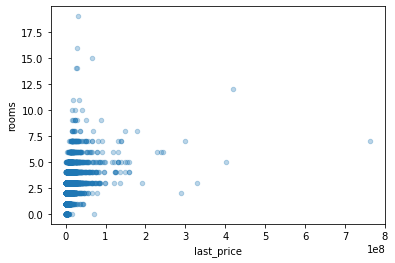

In [79]:
df.plot(x='last_price', y='rooms' , kind='scatter', alpha=0.3)
#df.plot(x='last_price', y='rooms' , kind='bar')
df['last_price'].corr(df['rooms'])

<i>Здесь сложно увидеть зависимость, но она все же прослеживается. Цена растет до 5й комнаты, но после этой отметки спадает.

<b>Построим график зависимости цены от типа этажа:

<AxesSubplot:xlabel='last_price', ylabel='floor_type'>

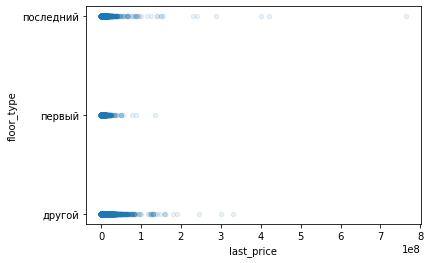

In [80]:
df.plot(x='last_price', y='floor_type' , kind='scatter', alpha=0.1)

<i>Здесь сложно проследить зависимость, но мы точно можем увидеть, что квартиры на 1м этаже в среднем стоят дешевле.

<b>Построим график зависимости цены от дня публикации:

0.002260827250878134

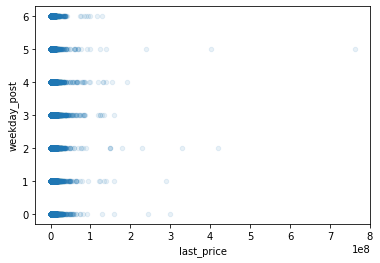

In [81]:
df.plot(x='last_price', y='weekday_post' , kind='scatter', alpha=0.1)
df['last_price'].corr(df['weekday_post'])

<i>Здесь нет зависимости.

Построим график зависимости цены от месяца публикации:

0.0027184172295673286

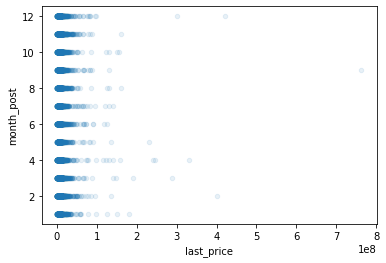

In [82]:
df.plot(x='last_price', y='month_post' , kind='scatter', alpha=0.1)
df['last_price'].corr(df['month_post'])

<i>Здесь тоже нет зависимости. Нельзя сказать, что квартиры как-то коррелируют с сезоном.

<b>Построим график зависимости цены от года публикации:

-0.042890130108772496

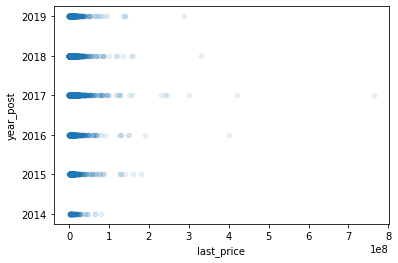

In [83]:
df.plot(x='last_price', y='year_post' , kind='scatter', alpha=0.1)
df['last_price'].corr(df['year_post'])

<i>Здесь мы видим, что квартиры подорожали в среднем после 2014 года. Но помимо этого корреляции не наблюдается.

<b>Так как стоимость от типа этажа, дня недели, месяца и года зависит нелинейно, для визуализации зависимости более наглядными будут графики типа bar по средним или медианам

<AxesSubplot:xlabel='rooms'>

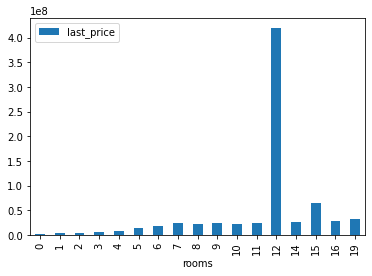

In [84]:
df.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(kind='bar')

В таком случае, выбиваются квартиры с 12 комнатами. Они стоят дороже всех - выше 400млн.р.

<AxesSubplot:xlabel='floor_type'>

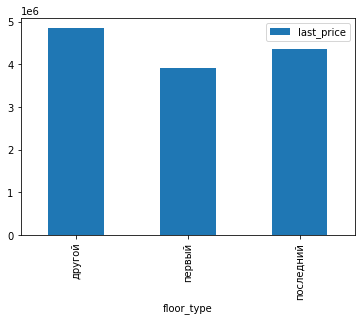

In [85]:
df.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(kind='bar')

Здесь все так же, квартиры на первом этаже в среднем дешевле остальных.

<AxesSubplot:xlabel='weekday_post'>

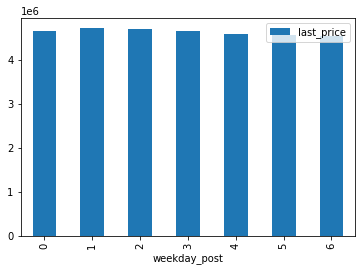

In [86]:
df.pivot_table(index='weekday_post', values='last_price', aggfunc='median').plot(kind='bar')

От дня недели дороговизна квартир не зависит

<AxesSubplot:xlabel='month_post'>

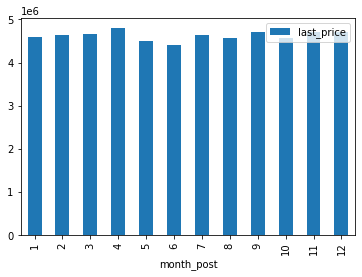

In [87]:
df.pivot_table(index='month_post', values='last_price', aggfunc='median').plot(kind='bar')

Видно просадку в цене в июне месяце.

<AxesSubplot:xlabel='year_post'>

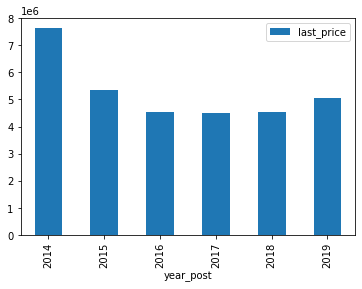

In [88]:
df.pivot_table(index='year_post', values='last_price', aggfunc='median').plot(kind='bar')

Квартиры в 2014 году в среднем стоили дороже всего - выше 7млн.р., после чего цены за квартиры не поднимались в среднем больше отметки в 5,5млн.р.

<b>Стоит также посмотреть на динамику изменения площади продаваемых квартир по годам. Возможно, упала не столько цена, сколько площадь продаваемых квартир?

<AxesSubplot:xlabel='year_post'>

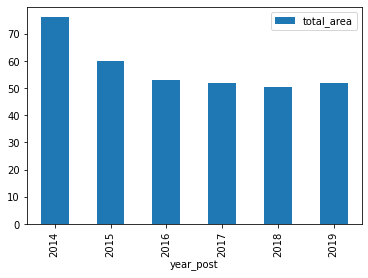

In [91]:
df.pivot_table(index='year_post', values='total_area', aggfunc='median').plot(kind='bar')

Видно, что с годами падает продаваемая площадь. Стали приобретать больше квартир с меньшей площадью, ввиду их более высокой ликвидности

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
- построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [89]:
# Создадим сводную таблицу с населенными пунктами, количеством объявлений и средней ценой за квадратный метр.
locality_data = df.pivot_table(index='locality_name', values='price_for_m2', aggfunc=['count','mean'])
# Переименуем столбцы
locality_data.columns = ['count','mean']
# Создадим новую таблицу, в которой сохраним топ 10 населенных пунктов с наибольшим числом объявлений
locality_data_top10 = locality_data.sort_values(by='count', ascending=False).head(10)
# Посмотрим данный топ, отсортировав по убыванию среднюю цену за кв.м.
locality_data_top10.sort_values(by='mean', ascending=False)

,count,mean
locality_name,,
Санкт-Петербург,15706,114801.958499
Пушкин,369,103125.819377
деревня Кудрово,299,92473.547559
поселок Парголово,327,90175.913089
поселок Мурино,556,85681.762572
поселок Шушары,440,78677.364318
Колпино,338,75424.579112
Гатчина,307,68746.146515
Всеволожск,397,68719.320378


<i>Как видим, в данном топе наибольшая (средняя) цена за кв.м. составляет 114769 рублей в Санкт-Петербурге. А наименьшая - 58238 рублей в Выборге.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Верно

</div>


##### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра. 
Учитывайте каждый километр расстояния: узнайте среднюю цену квартир в одном километре от центра, в двух и так далее. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.

-0.31512499896309376

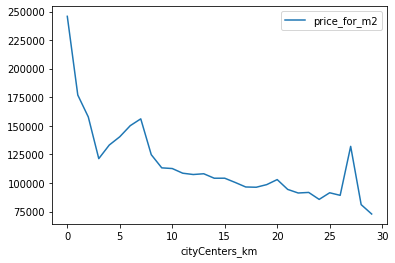

In [90]:
spb_data = df.query('locality_name == "Санкт-Петербург"')
spb_data.pivot_table(index='cityCenters_km', values='price_for_m2').plot()
spb_data['cityCenters_km'].corr(spb_data['price_for_m2'])

<i>Как видим, имеет место обратная зависимость, которая нарушается резкими пиками. Но, в целом, можно сказать, что удаление от центра влияет на стоимость квартиры.

### Промежуточный итог 
Мы изучили список параметром и избавились от аномалий в столбце с ценой, высотой потолков и количеством этажей.
Изучили, что квартиры в среднем продаются за 95 дней. То, что продается дольше 500 дней - необычно долгие продажи.

В ходе исследования выяснилось, что на цену квартиры влияет расстояние до центра города, количество комнат, площади помещения (общей, жилой и кухонной). Так же выяснилось, что квартиры на первом этаже в среднем дешевле, чем остальные. А вот день, месяц или год публикации на цену не влияют.

## Общий вывод

- В ходе исследования выяснилось, что на цену квартиры влияет расстояние до центра города (например, до 7км цена за кв.м. варьируется от 250т. до 150т. рублей после 7км от центра цена постепенно опускается со 150т. до 75т. рублей).
- Выбиваются квартиры с 12 комнатами. Они стоят дороже всех - выше 400млн.р. В то время, когда остальные не превышают отметки в 65млн.р.
- Квартиры на первом этаже в среднем дешевле остальных - до 4млн.р.
- От дня недели дороговизна квартир не зависит.
- Видно небольшую просадку в цене в июне месяце (4,4млн, в остальные месяца квартиры в среднем стоят на 100-400т.р. дороже).
- Квартиры в 2014 году в среднем стоили дороже всего - выше 7млн.р., после чего цены за квартиры не поднимались в среднем больше отметки в 5,5млн.р.